<a href="https://colab.research.google.com/github/monsund/unsupervised-classification-of-Linkedin-Profiles-using-KMeans-LDA-TFIDF/blob/master/random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
input_file = '/content/drive/My Drive/NLP/with_swaraj/Data/data_for_statistical_classification_1.csv'

In [ ]:
df = pd.read_csv(input_file)

In [ ]:
df.head()

,Unnamed: 0,url,username,title,about,dominant_topic,topic_prob,keywords
0,0,https://www.linkedin.com/in/lokesh-kumar-xess-...,lokesh-kumar-xess-54814068,Marketing & Strategy at Mobistreak,I am a Google Adwords and Google Analytics cer...,5,0.184839,"['marketing', 'digital', 'brand', 'medium', 'c..."
1,77,https://www.linkedin.com/in/jdellisanti,jdellisanti,"Product Innovation, Strategy and Marketing Exe...","Innovation, Strategy and Marketing Leader at t...",5,0.175725,"['marketing', 'digital', 'brand', 'medium', 'c..."
2,78,https://www.linkedin.com/in/niharmanwatkar,niharmanwatkar,Founder The Banana Design Company | Helping b...,"Specialties: Digital Marketing, Marketing & Co...",5,0.207002,"['marketing', 'digital', 'brand', 'medium', 'c..."
3,99,https://www.linkedin.com/in/gregarious,gregarious,"Serial Entrepreneur, Startup Mentor, Innovatio...",Gregarious “Greg” Narain has been at the foref...,5,0.161111,"['marketing', 'digital', 'brand', 'medium', 'c..."
4,143,https://www.linkedin.com/in/nadyakhoja,nadyakhoja,Chief Growth Officer at Venngage,Experienced Head Of Marketing with a demonstra...,5,0.161481,"['marketing', 'digital', 'brand', 'medium', 'c..."


In [ ]:
print(f'unique topic numbers: {df.dominant_topic.unique()}','\n')
topic_dic = {5: 'marketing domain', 8:'related to product visionnaire', 7:'related to data domain', 10:'software domain',14: 'entrepreneur or working with entrepreneur', 
             11:'related to investment; startups looking for investment', 3:'managerial field', 12:'business,strategic growth,revenue', 4:'hr or people management'}
topic_dic

unique topic numbers: [ 5  8  7 10 14 11  3 12  4] 



{3: 'managerial field',
 4: 'hr or people management',
 5: 'marketing domain',
 7: 'related to data domain',
 8: 'related to product visionnaire',
 10: 'software domain',
 11: 'related to investment; startups looking for investment',
 12: 'business,strategic growth,revenue',
 14: 'entrepreneur or working with entrepreneur'}

# **Remove Punctuation**

In [ ]:
# define punctuation
punctuations = '\'!()-[]{};:\"\,<>./?#$%^&*_~'

In [ ]:
#Function for removing punctuation and lowering case
def remove_punct(text):
  for char in text:
    if char in punctuations:
      text = text.lower().replace(char,' ')    #lowering case
      text = text.replace('  ', ' ')
  return text

In [ ]:
df['about_cleaned']= df.about.apply(lambda x: remove_punct(x))
df.head(3)

,Unnamed: 0,url,username,title,about,dominant_topic,topic_prob,keywords,about_cleaned
0,0,https://www.linkedin.com/in/lokesh-kumar-xess-...,lokesh-kumar-xess-54814068,Marketing & Strategy at Mobistreak,I am a Google Adwords and Google Analytics cer...,5,0.184839,"['marketing', 'digital', 'brand', 'medium', 'c...",i am a google adwords and google analytics cer...
1,77,https://www.linkedin.com/in/jdellisanti,jdellisanti,"Product Innovation, Strategy and Marketing Exe...","Innovation, Strategy and Marketing Leader at t...",5,0.175725,"['marketing', 'digital', 'brand', 'medium', 'c...",innovation strategy and marketing leader at th...
2,78,https://www.linkedin.com/in/niharmanwatkar,niharmanwatkar,Founder The Banana Design Company | Helping b...,"Specialties: Digital Marketing, Marketing & Co...",5,0.207002,"['marketing', 'digital', 'brand', 'medium', 'c...",specialties digital marketing marketing commun...


# **Remove Stopwords**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))
additional_stop_words = set(['technology', 'development', 'experience', 'project', 'company'])

In [ ]:
stop_words = stop_words.union(additional_stop_words)

In [ ]:
# Function removing stopwords-----------
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [w for w in word_tokens if not w in stop_words]
  data = (' '.join(filtered_text))
  return data

In [ ]:
df['about_cleaned'] = df.about_cleaned.apply(lambda x: remove_stopwords(x))

In [ ]:
df.head()

,Unnamed: 0,url,username,title,about,dominant_topic,topic_prob,keywords,about_cleaned
0,0,https://www.linkedin.com/in/lokesh-kumar-xess-...,lokesh-kumar-xess-54814068,Marketing & Strategy at Mobistreak,I am a Google Adwords and Google Analytics cer...,5,0.184839,"['marketing', 'digital', 'brand', 'medium', 'c...",google adwords google analytics certified ppc ...
1,77,https://www.linkedin.com/in/jdellisanti,jdellisanti,"Product Innovation, Strategy and Marketing Exe...","Innovation, Strategy and Marketing Leader at t...",5,0.175725,"['marketing', 'digital', 'brand', 'medium', 'c...",innovation strategy marketing leader nexus med...
2,78,https://www.linkedin.com/in/niharmanwatkar,niharmanwatkar,Founder The Banana Design Company | Helping b...,"Specialties: Digital Marketing, Marketing & Co...",5,0.207002,"['marketing', 'digital', 'brand', 'medium', 'c...",specialties digital marketing marketing commun...
3,99,https://www.linkedin.com/in/gregarious,gregarious,"Serial Entrepreneur, Startup Mentor, Innovatio...",Gregarious “Greg” Narain has been at the foref...,5,0.161111,"['marketing', 'digital', 'brand', 'medium', 'c...",gregarious “ greg ” narain forefront social me...
4,143,https://www.linkedin.com/in/nadyakhoja,nadyakhoja,Chief Growth Officer at Venngage,Experienced Head Of Marketing with a demonstra...,5,0.161481,"['marketing', 'digital', 'brand', 'medium', 'c...",experienced head marketing demonstrated histor...


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['dominant_topic'],axis=1)
y = df['dominant_topic']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# **TDIDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()

In [ ]:
X_traincv = tfidf_vec.fit_transform(X_train.about.to_list())
X_testcv = tfidf_vec.transform(X_test.about.to_list())

In [ ]:
X_traincv_array = X_traincv.toarray()

# **Save TFIDF Model**

In [ ]:
import pickle
with open("/content/drive/My Drive/NLP/with_swaraj/model/tfidf_model_profile_classification.pkl", "wb") as fp:   #Pickling
  pickle.dump(tfidf_vec, fp)


# **Clustering**

In [ ]:
# from sklearn.cluster import KMeans

In [ ]:
# kmeans_model = KMeans(n_clusters=9, init='k-means++', max_iter=100) 
# # X = kmeans_model.fit(model_pvdm.docvecs.doctag_syn0)
# x = kmeans_model.fit(X_traincv_array)
# labels = kmeans_model.labels_.tolist()

In [ ]:
# kmeans_prediction = kmeans_model.fit_predict(X_traincv_array)

# **Scatter plot**

In [ ]:
# # from sklearn.decomposition import PCA

# pca = PCA(n_components=2).fit(X_traincv_array)
# datapoint = pca.transform(X_traincv_array)

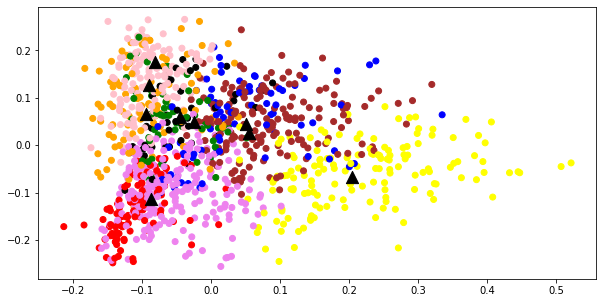

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.figure(figsize=(10, 5))
# # label1 = ['#FFFF00', '#008000', '#0000FF', '#800080', '#800450', '#800FF0', '#112328', '#620000', '#FF00FF', 'orange','#00FF66', '#302B54', '#CDAD00', '#D0FAEE', '#D41A1F']
# label1 =['red', 'green', 'yellow', 'blue','black','pink','brown','orange','violet']
# color = [label1[i] for i in labels]
# plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
# centroids = kmeans_model.cluster_centers_
# centroidpoint = pca.transform(centroids)
# plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
# plt.show()

# **Random Forest**

In [ ]:
#  importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_traincv,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predicted results
y_result = model.predict(X_testcv)
y_prob = model.predict_proba(X_testcv)

In [ ]:
y_prob[1]

array([0.02, 0.  , 0.04, 0.05, 0.02, 0.01, 0.69, 0.05, 0.12])

In [ ]:
# Accuracy check
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_result,y_test)
recall = recall_score(y_test, y_result, average='micro')
precision = precision_score(y_test, y_result, average='weighted')

print(f'accuracy: {accuracy}' ,'\n' )
print(f'recall: {recall}' ,'\n' )
print(f'precision: {precision}' ,'\n' )

accuracy: 0.8644688644688645 

recall: 0.8644688644688645 

precision: 0.8744262704442309 



In [ ]:
topic_dic

{3: 'managerial field',
 4: 'hr or people management',
 5: 'marketing domain',
 7: 'related to data domain',
 8: 'related to product visionnaire',
 10: 'software domain',
 11: 'related to investment; startups looking for investment',
 12: 'business,strategic growth,revenue',
 14: 'entrepreneur or working with entrepreneur'}

# **Function for finding Probability of Each Class**

In [ ]:
def get_class_prob(y_prob_list):
  topic_prob = []
  for i in range(len(y_prob_list)):
    topic3_prob = y_prob_list[i][0]
    topic4_prob = y_prob_list[i][1]
    topic5_prob = y_prob_list[i][2]
    topic7_prob = y_prob_list[i][3]
    topic8_prob = y_prob_list[i][4]
    topic10_prob = y_prob_list[i][5]
    topic11_prob = y_prob_list[i][6]
    topic12_prob = y_prob_list[i][7]
    topic14_prob = y_prob_list[i][8]
    
    dic = {'managerial field':topic3_prob, 'hr or people management':topic4_prob, 'marketing domain':topic5_prob, 'data science domain':topic7_prob,
          'product visionnaire, management related field':topic8_prob, 'software domain':topic10_prob, 'related to investment,startups looking for investment':topic11_prob,
          'business,strategic growth,revenue':topic12_prob, 'entrepreneur or working with entrepreneur':topic14_prob}
    sort_dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    topic_prob.append(sort_dic)
  return topic_prob  

In [ ]:
topic_prob = get_class_prob(y_prob[:len(y_prob)])


In [ ]:
topic_prob[1]

[('related to investment,startups looking for investment', 0.69),
 ('entrepreneur or working with entrepreneur', 0.12),
 ('data science domain', 0.05),
 ('business,strategic growth,revenue', 0.05),
 ('marketing domain', 0.04),
 ('managerial field', 0.02),
 ('product visionnaire, management related field', 0.02),
 ('software domain', 0.01),
 ('hr or people management', 0.0)]

# **Export Result**

In [ ]:
df_final = X_test

In [ ]:
df_final['actual'] = y_test
df_final['prediction'] = y_result
df_final['class_prob'] = topic_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_final.to_csv('/content/drive/My Drive/NLP/with_swaraj/Data/random_forest_classification_result_1.csv', index=False)

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_result)

array([[27,  0,  2,  0,  1,  1,  0,  0,  0],
       [ 1, 15,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  1,  0,  0],
       [ 2,  0,  0, 28,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 1,  0,  5,  2,  3,  0,  0, 12,  2],
       [ 0,  0,  3,  1,  1,  0,  3,  0,  9]])

# **Save Model**

In [ ]:
import pickle

with open("/content/drive/My Drive/NLP/with_swaraj/model/ranforest_model.pkl", "wb") as fp:   #Pickling
  pickle.dump(model, fp)
